In [1]:
#Important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=2)
import warnings
warnings.filterwarnings('ignore')

#Important functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
train_df=pd.read_csv('train.csv')
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test_df=pd.read_csv('test.csv')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
print("train shape: {} test shape: {}".format(train_df.shape, test_df.shape))

train shape: (8693, 14) test shape: (4277, 13)


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [7]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
train_df.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [20]:
train_df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [10]:
print([train_df.dtypes != 'object'])

[PassengerId     False
HomePlanet      False
CryoSleep       False
Cabin           False
Destination     False
Age              True
VIP             False
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name            False
Transported      True
dtype: bool]


In [11]:
train_df['Age']=train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age']=test_df['Age'].fillna(test_df['Age'].mean())

In [12]:
train_df['VIP']=train_df['VIP'].fillna(False)
test_df['VIP']=test_df['VIP'].fillna(False)

In [13]:
train_df['HomePlanet'] = train_df["HomePlanet"].fillna("Earth")
test_df['HomePlanet'] = test_df["HomePlanet"].fillna('Earth')

In [14]:
train_df['CryoSleep'] = train_df["CryoSleep"].fillna(False)
test_df['CryoSleep'] = test_df["CryoSleep"].fillna(False)

In [15]:
train_df['RoomService'].mode()

0    0.0
dtype: float64

In [16]:
train_df['Cabin'] = train_df['Cabin'].fillna('G/734/S')
test_df['Cabin'] = test_df['Cabin'].fillna('G/734/S')

In [17]:
train_df['Destination'] = train_df['Destination'].fillna('TRAPPIST-1e')
test_df['Destination'] = test_df['Destination'].fillna('TRAPPIST-1e')

In [18]:
attributes = ["RoomService", "FoodCourt", "ShoppingMall","Spa",'VRDeck']
for attribute in attributes:
    train_df[attribute] = train_df[attribute].fillna(0)
    test_df[attribute] = test_df[attribute].fillna(0)

In [19]:
attributes = (train_df.dtypes == 'object')
attributes = list(attributes[attributes].index)
attributes

['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name']

In [21]:
train_df.set_index('PassengerId',inplace=True)
test_df.set_index('PassengerId',inplace=True)

In [22]:
train_df[['Deck','Num','Side']] = train_df.Cabin.str.split('/',expand=True)
test_df[['Deck','Num','Side']] = test_df.Cabin.str.split('/',expand=True)

In [23]:
train_df[['Deck','Num','Side']].describe(include='O')

,Deck,Num,Side
count,8693,8693,8693
unique,8,1817,2
top,F,734,S
freq,2794,208,4487


In [24]:
train_df= train_df.drop(['Name','Cabin','Num'],axis=1)
test_df= test_df.drop(['Name','Cabin','Num'],axis=1)

In [28]:
cat_attributes= ['HomePlanet','CryoSleep','Destination','VIP','Deck','Side']
for i in cat_attributes:
    le = LabelEncoder()
    arr = np.concatenate((train_df[i], test_df[i])).astype(str)
    le.fit(arr)
    train_df[i] = le.transform(train_df[i].astype(str))
    test_df[i] = le.transform(test_df[i].astype(str))

In [31]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
PassengerId,,,,,,,,,,,,,
0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0
0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,1
0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1
0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1
0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1


In [30]:
train_df.Transported = train_df.Transported.replace({True:1, False:0})

In [36]:
X = train_df.drop("Transported", axis=1)
y = train_df.Transported

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

In [47]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
models = []
models.append(('RFC', RandomForestClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

In [46]:
models

[('RFC', RandomForestClassifier()),
 ('LR', LogisticRegression()),
 ('DTC', DecisionTreeClassifier()),
 ('KNC', KNeighborsClassifier()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('GNB', GaussianNB()),
 ('SVC', SVC(gamma='auto'))]

In [45]:
results=[]
names=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=10)#random_state=1
    cv_results=cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name,cv_results.mean(),cv_results.std()))

RFC: 0.793678 (0.006639)
LR: 0.780637 (0.010248)
DTC: 0.741217 (0.009826)
KNC: 0.776038 (0.011547)
LDA: 0.762228 (0.017572)
GNB: 0.702712 (0.014508)
SVC: 0.741524 (0.013103)


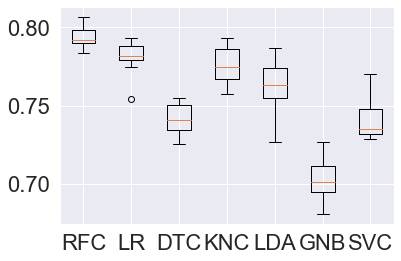

In [54]:
plt.boxplot(results, labels=names);

In [55]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
pred_y=rf.predict(X_val)
pred=rf.predict(X_train)   
print(accuracy_score(y_train.values,pred))
print(accuracy_score(y_val.values,pred_y))

0.9495321368308023
0.7911683532658693


In [59]:
rf.fit(X,y)

RandomForestClassifier()

In [60]:
pred=rf.predict(X)   
print(accuracy_score(y.values,pred))

0.945358334291959


In [61]:
y_pred = rf.predict(test_df)
submission=pd.DataFrame({'Transported':y_pred.astype(bool)},index=test_df.index)
submission.head()

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True


In [62]:
y_pred
m=0
n=0
for i in y_pred:
    if i==0:
        m+=1
    else:
        n+=1
print(m,'people have been transported safely.')
print(n,'people have been transported to an alternate dimension.')

2239 people have been transported safely.
2038 people have been transported to an alternate dimension.
